## 2nd simple user case study example
This time use the upper case version of the classification data, as lower cases caused issues on the first.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib.colors import LogNorm

%matplotlib inline

In [22]:
!ls -l *.dta

-rw-r--r--@ 1 ahuxor  staff   51973915  4 Aug  2010 assignee.dta
-rwxr-xr-x@ 1 ahuxor  staff  236509670 28 Mar  2009 cite76_06.dta
-rwxr-xr-x@ 1 ahuxor  staff   56791108 17 Aug  2013 orig_gen_76_06.dta
-rw-r--r--@ 1 ahuxor  staff  364030957  4 Aug  2010 pat76_06_assg.dta
-rw-r--r--@ 1 ahuxor  staff  252609858  4 Aug  2010 pat76_06_ipc.dta
-rw-r--r--@ 1 ahuxor  staff  263827184  7 Apr  2008 patassg.dta


In [24]:
pat76_06_ipc_df = pd.read_stata('pat76_06_ipc.dta')


In [25]:
# convert any IPC casses to upper case if any lower case
icl_uc = pat76_06_ipc_df.icl.apply(lambda x: x.upper())
icl_class_uc = pat76_06_ipc_df.icl_class.apply(lambda x: x.upper())

pat76_06_ipc_df['icl_uc'] = icl_uc
pat76_06_ipc_df['icl_class_uc'] = icl_class_uc

In [26]:
pat76_06_ipc_df.head().T

,0,1,2,3,4
appyear,1974,1974,1975,1975,1974
cat,6,6,6,6,5
gyear,1976,1976,1976,1976,1976
icl,A41D 1900,A47D 701,A47D 702,A47C 2100,B63B 708
icl_class,A41D,A47D,A47D,A47C,B63B
icl_maingroup,19,7,7,21,7
iclnum,1,1,1,2,1
nclass,2,5,5,5,114
numipc,1,1,2,2,1
patent,3930271,3930272,3930273,3930273,3930274


In [65]:
pat76_06_ipc_df[pat76_06_ipc_df.patent == 4486527].pdpass.values

array([ 10182902.,  10182902.,  10182902.])

In [27]:
# create new column for the IPC section letter of the classification
pat76_06_ipc_df['section'] = pat76_06_ipc_df['icl_class_uc'].astype(str).str[0]

pat76_06_ipc_G_section_df =pat76_06_ipc_df[pat76_06_ipc_df.section == 'G']



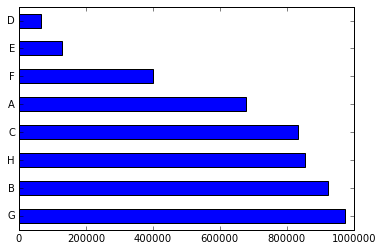

In [87]:
# plot of relative proportions of each section
# First eliminate 
pat76_06_ipc_df_dropdupes = pat76_06_ipc_df_valid.drop_duplicates('patent')
pat76_06_ipc_df_dropdupes_valid = pat76_06_ipc_df[(pat76_06_ipc_df.section == 'A') | \
                                        (pat76_06_ipc_df.section == 'B') | \
                                       (pat76_06_ipc_df.section == 'C') | \
                                       (pat76_06_ipc_df.section == 'D') | \
                                       (pat76_06_ipc_df.section == 'E') | \
                                       (pat76_06_ipc_df.section == 'F') | \
                                       (pat76_06_ipc_df.section == 'G') | \
                                       (pat76_06_ipc_df.section == 'H')]
pat76_06_ipc_df_dropdupes_valid.section.value_counts().plot(kind='barh', rot=0)
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/ipc_sections_barplot.pdf", bbox_inches = 'tight')



In [28]:
pat76_06_ipc_G_section_df.head().T

,65,69,77,78,125
appyear,1974,1975,1974,1974,1974
cat,6,6,6,6,6
gyear,1976,1976,1976,1976,1976
icl,G01C 1902,G09B 306,G09D 306,G09F 708,G04C 2116
icl_class,G01C,G09B,G09D,G09F,G04C
icl_maingroup,19,3,3,7,21
iclnum,1,1,1,1,1
nclass,33,434,40,40,368
numipc,1,2,1,1,1
patent,3930317,3930321,3930326,3930327,3930358


In [29]:
# create a new df in which duplicates -- only in icl_class and patent -- are removed
# if later want to use full icl, then must not do this step.
pat76_06_ipc_G_section_df_dupless = pat76_06_ipc_G_section_df.drop_duplicates(['icl_class_uc','patent'])

In [30]:
print(len(pat76_06_ipc_df))
len(pat76_06_ipc_G_section_df_dupless)

4857833


794593

In [34]:
pat76_06_ipc_G_section_df_dupless[110:120]

,appyear,cat,gyear,icl,icl_class,icl_maingroup,iclnum,nclass,numipc,patent,pdpass,subcat,subclass,uspto_assignee,icl_uc,icl_class_uc,section
959,1970,4.0,1976,G21C 308,G21C,3.0,1,376.0,2,3930940,10155465.0,44.0,436.0,113470.0,G21C 308,G21C,G
961,1973,4.0,1976,G21c 308,G21c,3.0,1,376.0,1,3930941,10194953.0,44.0,454.0,222190.0,G21C 308,G21C,G
962,1973,4.0,1976,G21c 1708,G21c,17.0,1,376.0,1,3930942,10030942.0,44.0,463.0,50070.0,G21C 1708,G21C,G
963,1973,4.0,1976,G21f 300,G21f,3.0,1,376.0,2,3930943,11821807.0,44.0,287.0,512710.0,G21F 300,G21F,G
964,1973,4.0,1976,G21c 1102,G21c,11.0,2,376.0,2,3930943,11821807.0,44.0,287.0,512710.0,G21C 1102,G21C,G
1017,1974,1.0,1976,G01N 2736,G01N,27.0,1,204.0,1,3930976,10098375.0,19.0,420.0,220840.0,G01N 2736,G01N,G
1040,1974,5.0,1976,G06K 2100,G06K,21.0,1,209.0,1,3930992,10164356.0,51.0,552.0,491460.0,G06K 2100,G06K,G
1041,1974,5.0,1976,G01R 1152,G01R,11.0,1,209.0,2,3930993,10258569.0,51.0,551.0,123425.0,G01R 1152,G01R,G
1063,1974,1.0,1976,G01F 324,G01F,3.0,3,210.0,3,3931009,NaN,19.0,108.0,0.0,G01F 324,G01F,G
1126,1974,2.0,1976,G02B 523,G02B,5.0,2,349.0,4,3931041,10053462.0,23.0,185.0,635240.0,G02B 523,G02B,G


In [35]:
### start looking at final example
#get a typical patent 
#a_patent = pat76_06_ipc_df[4002:4003].patent.values[0]
a_patent = 3930943 # use one we know has 2 classes attached
a_patent

3930943

In [37]:
# get all icl_classes involved in this patent
classes = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==a_patent].icl_class_uc.values.tolist()
classes

['G21F', 'G21C']

In [39]:
# get list of all icl_class_uc available 
section_G_icl_classes = pat76_06_ipc_G_section_df_dupless.icl_class_uc.unique().tolist()

In [40]:
# Need to create new data structures aggregating icl_classes for each patent number
pat76_06_ipc_G_section_df_dupless.head().T

,65,69,77,78,125
appyear,1974,1975,1974,1974,1974
cat,6,6,6,6,6
gyear,1976,1976,1976,1976,1976
icl,G01C 1902,G09B 306,G09D 306,G09F 708,G04C 2116
icl_class,G01C,G09B,G09D,G09F,G04C
icl_maingroup,19,3,3,7,21
iclnum,1,1,1,1,1
nclass,33,434,40,40,368
numipc,1,2,1,1,1
patent,3930317,3930321,3930326,3930327,3930358


In [41]:
# get list of (unique) patents
all_patents = pat76_06_ipc_G_section_df_dupless.patent.values
all_patents[0]

3930317

In [42]:
%%time
list_of_patents = []
list_of_list_of_classes = []

for j in range(0,100000):
    a_patent = all_patents[j]
    list_of_patents.append(a_patent)
    list_of_classes = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent == a_patent].icl_class_uc.values
    list_of_list_of_classes.append(list_of_classes)

CPU times: user 3min 24s, sys: 5.01 s, total: 3min 29s
Wall time: 3min 39s


In [43]:
len(list_of_list_of_classes)

100000

In [44]:
temp_dict = dict( patent = list_of_patents, icl_classes = list_of_list_of_classes )
df = pd.DataFrame.from_dict(temp_dict, orient='index').T

In [45]:
# cannot use drop_duplicates on icl_classes contains a list, so drop on patent
df1=df.drop_duplicates(['patent'])
df1.tail(10)

,icl_classes,patent
99987,"[G03F, G03C]",4486518
99989,[G03G],4486519
99990,[G03G],4486520
99991,[G03G],4486521
99992,[G03G],4486522
99993,[G03G],4486523
99994,[G03G],4486524
99995,[G03G],4486525
99996,"[G03C, G03F]",4486526
99998,"[G03C, G01D]",4486527


In [57]:
# get example patent
zz = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==4486527].icl_class_uc.values
zz1 = zz.tolist()
zz1

['G03C', 'G01D']

In [58]:
pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==4486527].T

,825868,825870
appyear,1983,1983
cat,1,1
gyear,1984,1984
icl,G03C 158,G01D 1510
icl_class,G03C,G01D
icl_maingroup,1,15
iclnum,1,3
nclass,430,430
numipc,3,3
patent,4486527,4486527


In [59]:
# find others with exactly the same classes

exact_match = df1[(df1['icl_classes'].astype(str).str.contains('G03C')) & \
                  (df1['icl_classes'].astype(str).str.contains('G01D'))  ]

In [60]:
print(len(exact_match))
exact_match

19


,icl_classes,patent
36305,"[G03C, G01D]",4142896
48955,"[G03C, G01D]",4211838
56225,"[G03C, G01D]",4252890
57412,"[G03C, G01M, G01D]",4259431
59241,"[G03C, G01D]",4269917
60882,"[G03C, G01D]",4278756
62713,"[G03C, G01D]",4288510
65868,"[G03C, G01D]",4304848
66077,"[G01D, G03C, G11B]",4306013
66517,"[G01D, G03C, G11B]",4308337


# start on co-occurrence matrix and cosine similarity

In [113]:
# create list for unique_icl_class, rather than numpy array
unique_icl_class = pat76_06_ipc_G_section_df_dupless.icl_class_uc.unique()
unique_icl_class_list = sorted(unique_icl_class.tolist())

unique_icl_class_list

['G 1B',
 'G00',
 'G00B',
 'G00C',
 'G00F',
 'G00G',
 'G00J',
 'G00K',
 'G00N',
 'G00T',
 'G00V',
 'G01',
 'G01A',
 'G01B',
 'G01C',
 'G01D',
 'G01E',
 'G01F',
 'G01G',
 'G01H',
 'G01I',
 'G01J',
 'G01K',
 'G01L',
 'G01M',
 'G01N',
 'G01O',
 'G01P',
 'G01Q',
 'G01R',
 'G01S',
 'G01T',
 'G01U',
 'G01V',
 'G01W',
 'G01Y',
 'G01Z',
 'G02',
 'G02?',
 'G02A',
 'G02B',
 'G02C',
 'G02D',
 'G02E',
 'G02F',
 'G02G',
 'G02H',
 'G02I',
 'G02J',
 'G02K',
 'G02L',
 'G02M',
 'G02N',
 'G02P',
 'G02R',
 'G02S',
 'G02T',
 'G02V',
 'G03',
 'G03A',
 'G03B',
 'G03C',
 'G03D',
 'G03E',
 'G03F',
 'G03G',
 'G03H',
 'G03J',
 'G03K',
 'G03L',
 'G03M',
 'G03N',
 'G03O',
 'G03P',
 'G03Q',
 'G03R',
 'G03S',
 'G03T',
 'G04B',
 'G04C',
 'G04D',
 'G04E',
 'G04F',
 'G04G',
 'G04H',
 'G04J',
 'G04K',
 'G04L',
 'G04M',
 'G04N',
 'G04P',
 'G04Q',
 'G04R',
 'G04S',
 'G04V',
 'G05',
 'G058',
 'G05B',
 'G05C',
 'G05D',
 'G05E',
 'G05F',
 'G05G',
 'G05H',
 'G05I',
 'G05J',
 'G05K',
 'G05L',
 'G05N',
 'G05O',
 'G05P',
 'G05Q

In [119]:
# create list for patents, 
unique_patents = pat76_06_ipc_G_section_df_dupless.patent.unique()
unique_patents_list = sorted(unique_patents.tolist())
unique_patents_list

[3930317,
 3930321,
 3930326,
 3930327,
 3930358,
 3930359,
 3930360,
 3930361,
 3930362,
 3930363,
 3930397,
 3930398,
 3930399,
 3930400,
 3930401,
 3930402,
 3930403,
 3930404,
 3930405,
 3930406,
 3930407,
 3930408,
 3930409,
 3930410,
 3930411,
 3930412,
 3930413,
 3930414,
 3930427,
 3930429,
 3930430,
 3930431,
 3930459,
 3930466,
 3930504,
 3930512,
 3930546,
 3930556,
 3930560,
 3930561,
 3930581,
 3930601,
 3930610,
 3930611,
 3930612,
 3930613,
 3930653,
 3930654,
 3930700,
 3930711,
 3930712,
 3930713,
 3930714,
 3930715,
 3930716,
 3930717,
 3930718,
 3930719,
 3930720,
 3930721,
 3930722,
 3930723,
 3930724,
 3930725,
 3930726,
 3930727,
 3930728,
 3930729,
 3930730,
 3930732,
 3930733,
 3930734,
 3930735,
 3930736,
 3930764,
 3930775,
 3930798,
 3930850,
 3930851,
 3930852,
 3930853,
 3930854,
 3930855,
 3930856,
 3930857,
 3930858,
 3930859,
 3930860,
 3930861,
 3930862,
 3930863,
 3930864,
 3930865,
 3930866,
 3930867,
 3930868,
 3930869,
 3930891,
 3930892,
 3930918,


In [117]:
feature_vectors_df = pd.DataFrame({'icl_class' : unique_icl_class})
feature_vectors_df.head()

,icl_class
0,G 1B
1,G00
2,G00B
3,G00C
4,G00F


In [116]:
# TRYING TO PROFILE
# TRY TO ONLY USE LISTS, TO THE VERY END
# now try and get vectors for each assignee of the number of patents they hold in each icl_class

# create final dataframe to hold results, starting with all classes as first column
# num = number of patents to look at
def get_patent_class_counts_for_assignees(num):
    feature_vectors_listoflists =[]
    # first get list of (unique) assignees (try first five first to test code)
    range_of_assignees = unique_assignees[0:num]
    # then for each one of them, 
    for assignee in range_of_assignees:
        # look at all the patent classes each assignee has
        temp = pat76_06_assg_df_valid_pdpass[pat76_06_assg_df_valid_pdpass.pdpass==assignee].icl_class
        icl_codes_in_current_list = list(temp.values)
        #  and count instances of these if multiple instances of any 
        n = len(unique_icl_class)
        icl_codes_per_assignee_list = []
        for m in range(0,n):
            current_icl_class = unique_icl_class_list[m]
            counted = icl_codes_in_current_list.count(current_icl_class)
            icl_codes_per_assignee_list.append(counted)
            col_name_used = assignee.astype(str)
        #feature_vectors_df[col_name_used]=icl_codes_per_assignee_vector
        feature_vectors_listoflists.append((icl_codes_per_assignee_list))
    return(feature_vectors_listoflists)

In [121]:
# create co-occurrence matrix for patents
# start with small sample before 'for a_patent in unique_patents_list
# each patent starts with a list of zeros, which are swithed to a 'one' if class is given to it.
for i in range(0,5):
    print('pat num = ',unique_patents_list[i])


pat num =  3930317
pat num =  3930321
pat num =  3930326
pat num =  3930327
pat num =  3930358


In [122]:
pat76_06_ipc_G_section_df_dupless.head()

,appyear,cat,gyear,icl,icl_class,icl_maingroup,iclnum,nclass,numipc,patent,pdpass,subcat,subclass,uspto_assignee,icl_uc,icl_class_uc,section
65,1974,6.0,1976,G01C 1902,G01C,19.0,1,33.0,1,3930317,10036902.0,69.0,318.0,597185.0,G01C 1902,G 1B,G
69,1975,6.0,1976,G09B 306,G09B,3.0,1,434.0,2,3930321,NaN,69.0,334.0,0.0,G09B 306,G 1B,G
77,1974,6.0,1976,G09D 306,G09D,3.0,1,40.0,1,3930326,NaN,69.0,114.0,0.0,G09D 306,G00,G
78,1974,6.0,1976,G09F 708,G09F,7.0,1,40.0,1,3930327,10030327.0,69.0,620.0,52740.0,G09F 708,G00B,G
125,1974,6.0,1976,G04C 2116,G04C,21.0,1,368.0,1,3930358,10446448.0,69.0,257.0,218550.0,G04C 2116,G00B,G


In [126]:
# should be able to use get_dummy
pat76_06_ipc_G_section_df[['patent','icl_class_uc']]

,patent,icl_class_uc
65,3930317,G01C
69,3930321,G09B
77,3930326,G09D
78,3930327,G09F
125,3930358,G04C
126,3930359,G04F
128,3930360,G04B
129,3930361,G04B
130,3930361,G04B
131,3930362,G04B
